In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import numpy as np

#data path 수정
os.chdir("C:\\Users\\Owner2\\Desktop\\G팔로미_vuno")
os.getcwd()

'C:\\Users\\Owner2\\Desktop\\G팔로미_vuno'

In [2]:
train_dir = './train_double_input/benign_malignant'

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    #featurewise_center=True, #center 중심 유지
    #featurewise_std_normalization=True, #normalization
    rotation_range=25.0,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #brightness_range=[0.2,1.0],
    zoom_range=[0.8,1.2],
    horizontal_flip=True,
    validation_split=0.2) #수평방향 뒤집기

Using TensorFlow backend.


In [4]:
train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(224,224),
        batch_size=32,
        subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(224,224),
    batch_size=32,
    subset='validation') # set as validation data

Found 1370 images belonging to 2 classes.
Found 342 images belonging to 2 classes.


In [5]:
def f1score(precision, recall):
    _f1score = ( 2 * recall * precision) / (recall + precision)
    
    # return a single tensor value
    return _f1score

In [18]:
from keras import models, layers
from keras import Input
from keras.applications import VGG16, ResNet50
from keras.models import Model, load_model ,Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import BatchNormalization, Dropout, Conv2D, Activation, Dense, Add, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [19]:
# checkpoint = ModelCheckpoint(filepath='My_VGG_{epoch:03d}_{val_loss:.7f}.hdf5',monitor='loss', mode='min', save_best_only=True)
checkpoint = ModelCheckpoint(filepath='png_model_pathology_basic.hdf5', 
            monitor='val_loss', 
            mode='min', 
            save_best_only=True)

In [20]:
import tensorflow as tf

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.SGD(learning_rate=0.001),
              metrics=['acc',tf.keras.metrics.AUC(),
                      tf.keras.metrics.Precision(),
                      tf.keras.metrics.Recall(),f1score])

In [21]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch = train_generator.samples /32,
      epochs=100,
      validation_data = validation_generator, 
      validation_steps = validation_generator.samples/32,
      callbacks=[checkpoint])

Epoch 1/100
43/42 [==============================] - 18s 427ms/step - loss: 0.6981 - acc: 0.4982 - auc_4: 0.4966 - precision_4: 0.4993 - recall_4: 0.6384 - f1score: 0.3357 - val_loss: 0.6816 - val_acc: 0.5088 - val_auc_4: 0.4991 - val_precision_4: 0.4997 - val_recall_4: 0.5528 - val_f1score: 0.3334
Epoch 2/100
43/42 [==============================] - 16s 370ms/step - loss: 0.6964 - acc: 0.5055 - auc_4: 0.5035 - precision_4: 0.5032 - recall_4: 0.5378 - f1score: 0.3328 - val_loss: 0.6949 - val_acc: 0.5132 - val_auc_4: 0.5041 - val_precision_4: 0.5035 - val_recall_4: 0.5258 - val_f1score: 0.3331
Epoch 3/100
43/42 [==============================] - 17s 390ms/step - loss: 0.6935 - acc: 0.5197 - auc_4: 0.5056 - precision_4: 0.5057 - recall_4: 0.5209 - f1score: 0.3325 - val_loss: 0.6965 - val_acc: 0.5175 - val_auc_4: 0.5097 - val_precision_4: 0.5090 - val_recall_4: 0.5179 - val_f1score: 0.3336
Epoch 4/100
43/42 [==============================] - 17s 387ms/step - loss: 0.6958 - acc: 0.5102 - a

43/42 [==============================] - 15s 360ms/step - loss: 0.6918 - acc: 0.5208 - auc_4: 0.5198 - precision_4: 0.5132 - recall_4: 0.5251 - f1score: 0.3345 - val_loss: 0.6950 - val_acc: 0.5336 - val_auc_4: 0.5200 - val_precision_4: 0.5134 - val_recall_4: 0.5254 - val_f1score: 0.3349
Epoch 29/100
43/42 [==============================] - 16s 361ms/step - loss: 0.6916 - acc: 0.5255 - auc_4: 0.5205 - precision_4: 0.5137 - recall_4: 0.5254 - f1score: 0.3334 - val_loss: 0.6912 - val_acc: 0.5556 - val_auc_4: 0.5206 - val_precision_4: 0.5139 - val_recall_4: 0.5254 - val_f1score: 0.3345
Epoch 30/100
43/42 [==============================] - 17s 393ms/step - loss: 0.6919 - acc: 0.5091 - auc_4: 0.5207 - precision_4: 0.5140 - recall_4: 0.5256 - f1score: 0.3344 - val_loss: 0.6947 - val_acc: 0.5351 - val_auc_4: 0.5207 - val_precision_4: 0.5140 - val_recall_4: 0.5267 - val_f1score: 0.3352
Epoch 31/100
43/42 [==============================] - 16s 376ms/step - loss: 0.6918 - acc: 0.5142 - auc_4: 0.5

43/42 [==============================] - 15s 354ms/step - loss: 0.6902 - acc: 0.5266 - auc_4: 0.5279 - precision_4: 0.5200 - recall_4: 0.5404 - f1score: 0.3335 - val_loss: 0.6799 - val_acc: 0.5497 - val_auc_4: 0.5281 - val_precision_4: 0.5201 - val_recall_4: 0.5404 - val_f1score: 0.3342
Epoch 56/100
43/42 [==============================] - 16s 361ms/step - loss: 0.6902 - acc: 0.5288 - auc_4: 0.5282 - precision_4: 0.5203 - recall_4: 0.5403 - f1score: 0.3338 - val_loss: 0.6931 - val_acc: 0.5585 - val_auc_4: 0.5285 - val_precision_4: 0.5204 - val_recall_4: 0.5404 - val_f1score: 0.3347
Epoch 57/100
43/42 [==============================] - 16s 363ms/step - loss: 0.6921 - acc: 0.5241 - auc_4: 0.5286 - precision_4: 0.5204 - recall_4: 0.5404 - f1score: 0.3342 - val_loss: 0.6835 - val_acc: 0.5482 - val_auc_4: 0.5287 - val_precision_4: 0.5205 - val_recall_4: 0.5407 - val_f1score: 0.3351
Epoch 58/100
43/42 [==============================] - 15s 360ms/step - loss: 0.6886 - acc: 0.5391 - auc_4: 0.5

43/42 [==============================] - 16s 362ms/step - loss: 0.6875 - acc: 0.5292 - auc_4: 0.5356 - precision_4: 0.5243 - recall_4: 0.5428 - f1score: 0.3352 - val_loss: 0.6828 - val_acc: 0.5614 - val_auc_4: 0.5357 - val_precision_4: 0.5243 - val_recall_4: 0.5429 - val_f1score: 0.3354
Epoch 83/100
43/42 [==============================] - 15s 360ms/step - loss: 0.6864 - acc: 0.5566 - auc_4: 0.5360 - precision_4: 0.5245 - recall_4: 0.5431 - f1score: 0.3358 - val_loss: 0.6938 - val_acc: 0.5614 - val_auc_4: 0.5363 - val_precision_4: 0.5247 - val_recall_4: 0.5434 - val_f1score: 0.3360
Epoch 84/100
43/42 [==============================] - 15s 359ms/step - loss: 0.6908 - acc: 0.5204 - auc_4: 0.5363 - precision_4: 0.5247 - recall_4: 0.5434 - f1score: 0.3341 - val_loss: 0.6915 - val_acc: 0.5453 - val_auc_4: 0.5362 - val_precision_4: 0.5247 - val_recall_4: 0.5432 - val_f1score: 0.3350
Epoch 85/100
43/42 [==============================] - 16s 361ms/step - loss: 0.6909 - acc: 0.5204 - auc_4: 0.5

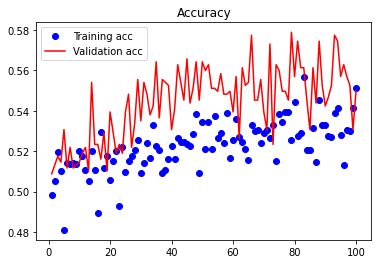

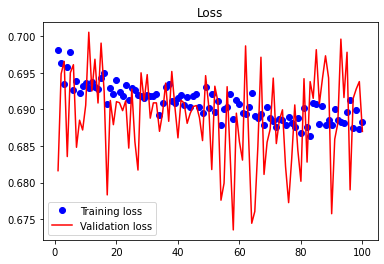

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
 
plt.show()

In [25]:
_loss, _acc, _auc, _precision, _recall, _f1score =  model.evaluate_generator(validation_generator, steps=32)
print('loss: {:.3f}, accuracy: {:.3f}, auc: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _auc, _precision, _recall, _f1score))

loss: 0.683, accuracy: 0.558, auc: 0.539, precision: 0.527, recall: 0.544, f1score: 0.335


In [17]:
from keras.models import Model, load_model

new_model = models.load_model('png_VGG16_finetuning.hdf5',compile=False)


new_model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adam(lr=1e-5),
              metrics=['acc',tf.keras.metrics.AUC(),
                      tf.keras.metrics.Precision(),
                      tf.keras.metrics.Recall(),f1score])

OSError: Unable to open file (unable to open file: name = 'png_VGG16_finetuning.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
test_dir='./test_without_callback'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32)

In [ ]:
_loss, _acc, _auc, _precision, _recall, _f1score =new_model.evaluate_generator(test_generator, steps=test_generator.samples/32)
print('loss: {:.3f}, accuracy: {:.3f}, auc: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _auc, _precision, _recall, _f1score))